# **KNN Challenge**

_John Andrew Dixon_

--- 

**Setup**

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
from IPython.display import clear_output

In [28]:
# Remote url to the dataset
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vTRFwdVrBH_SKaotm2ovfLYLu9bMi4UK3ielkOSVyAsF3hn32bAs_9d9JltakpMPl9JSzSonecEc10x/pub?output=csv"
# Get the data and verify it loaded
df = pd.read_csv(url)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             4177 non-null   object 
 1   length          4177 non-null   float64
 2   diameter        4177 non-null   float64
 3   height          4177 non-null   float64
 4   whole_weight    4177 non-null   float64
 5   shucked_weight  4177 non-null   float64
 6   viscera_weight  4177 non-null   float64
 7   shell_weight    4177 non-null   float64
 8   rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


---

## **Tasks**

### **Data Exploration**

In [29]:
# View duplicate count
print("Duplicates:", df.duplicated().sum())

Duplicates: 0


In [30]:
# View missing values
print("Missing values")
df.isna().sum()

Missing values


sex               0
length            0
diameter          0
height            0
whole_weight      0
shucked_weight    0
viscera_weight    0
shell_weight      0
rings             0
dtype: int64

### **Is this a balanced data set?**

In [31]:
# Create the feature matrix and target vector
X = df.drop(columns="sex")
y = df["sex"]

In [32]:
# Assess value counts
y.value_counts(normalize=True)

M    0.365813
I    0.321283
F    0.312904
Name: sex, dtype: float64

For the most part, it is balanced with a slight imbalance toward male.

### **Be sure to scale your data (try using the pipeline!)**

In [33]:
# Create a train test split
X_train, X_test, y_train, y_test =  train_test_split(X, y, random_state=42)

In [34]:
# Instantiate a standard scaler
scaler = StandardScaler()
# Instantiate the KNN Classifier
knnc = KNeighborsClassifier()
# Wrap the KNN in a pipeline with the scaler
knnc_pipeline = make_pipeline(scaler, knnc)

In [35]:
# Fit the KNNC pipeline to the training data
knnc_pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

### **What is the accuracy of your default model?**

In [36]:
# Get predictions on both training and testing sets
train_pred = knnc_pipeline.predict(X_train)
test_pred = knnc_pipeline.predict(X_test)

In [37]:
# Output default accuracy
print("Training set prediction accuracy:", accuracy_score(y_train, train_pred))
print("Testing set prediction accuracy:", accuracy_score(y_test, test_pred))

Training set prediction accuracy: 0.679757343550447
Testing set prediction accuracy: 0.5473684210526316


### **What is the optimal accuracy you can achieve by tuning the value of K using KNN?**

In [38]:
# Get the params to see the default K
knnc_pipeline['kneighborsclassifier'].get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [39]:
k_neighbors = range(1, 51, 1)

tunings = pd.DataFrame(columns=["Training Accuracy", "Testing Accuracy"], index=k_neighbors)

for k in k_neighbors:
    # Get a little countdown timer
    clear_output()
    print(k)

    # Instantiate a new KNN Classifier of n_neighbors n
    knnc = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    # Create a KNN Classifier pipeline
    knnc_pipeline = make_pipeline(scaler, knnc)

    # Fit the pipeline on the training data
    knnc_pipeline.fit(X_train, y_train)

    # Generate predictions
    train_pred = knnc_pipeline.predict(X_train)
    test_pred = knnc_pipeline.predict(X_test)

    # Calculate accuracy of each prediction and add to dataframe
    tunings.loc[k, "Training Accuracy"] = accuracy_score(y_train, train_pred)
    tunings.loc[k, "Testing Accuracy"] = accuracy_score(y_test, test_pred)

50


In [40]:
best_k = tunings.sort_values("Testing Accuracy", ascending=False).index[0]
best_k

38

The optimal K is 38.

### **Create a confusion matrix for your optimal KNN model.**

In [41]:
# Create the optimal KNN within a pipeline
knnc_pipeline = make_pipeline(scaler, KNeighborsClassifier(n_neighbors=38))
# Fit the above model
knnc_pipeline.fit(X_train, y_train)
# Get predictions
test_pred = knnc_pipeline.predict(X_test)

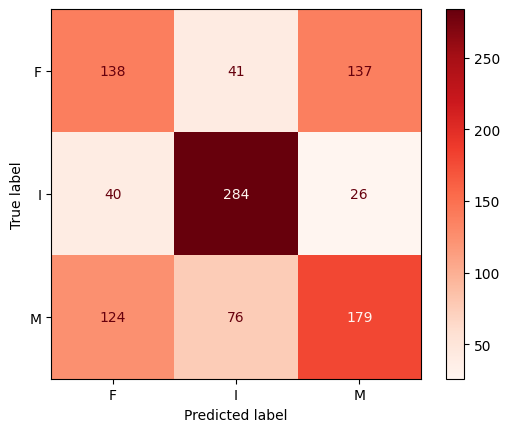

In [42]:
ConfusionMatrixDisplay.from_predictions(y_test, test_pred, cmap="Reds");